In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

import seaborn as sns
sns.set()

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

def calculate_error_table(y_test,y_hat):
    MSE = mean_squared_error(y_test,y_hat)     
    MAE = mean_absolute_error(y_test, y_hat)
    RMSE = sqrt(mean_squared_error(y_test, y_hat))
    MAPE = mean_absolute_percentage_error(y_test, y_hat)
    RSQUARED = r2_score(y_test, y_hat)

    errorTable = pd.DataFrame([MSE], columns=['MSE'])
    errorTable['MAPE'] = [MAPE]
    errorTable['MAE'] = [MAE]
    errorTable['RMSE'] = [RMSE]
    errorTable['RSQUARED'] = [RSQUARED]

    return errorTable.style.hide_index()
def display_pred_with_test(y_test,y_hat):
    df_pf = pd.DataFrame(y_hat, columns=['Prediction'])
    y_test = y_test.reset_index(drop=True)
    df_pf['Target'] = y_test
    return df_pf
    

In [2]:
raw_data = pd.read_csv("public_cars.csv")
raw_data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


In [3]:
from sklearn.datasets import load_diabetes


In [4]:
raw_data.describe(include="all")

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
count,30824,30824,30824,30824,30824.000000,30824.000000,30824,30824,30824,30816.000000,...,30824,30824,30824,30824,30824,30824,30824,30824,30824.000000,30824.000000
unique,55,1070,2,12,NaN,NaN,6,2,3,NaN,...,2,2,2,2,2,2,2,2,NaN,NaN
top,Volkswagen,Passat,mechanical,black,NaN,NaN,gasoline,False,gasoline,NaN,...,False,False,False,False,False,False,False,True,NaN,NaN
freq,3406,1153,20493,6162,NaN,NaN,19259,29754,20511,NaN,...,23945,22341,23417,19916,25599,22767,18043,17787,NaN,NaN
mean,NaN,NaN,NaN,NaN,248803.130515,2002.939690,NaN,NaN,NaN,2.054232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.344407,6630.598604
std,NaN,NaN,NaN,NaN,135760.720763,8.048786,NaN,NaN,NaN,0.667535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.656926,6412.213626
min,NaN,NaN,NaN,NaN,0.000000,1950.000000,NaN,NaN,NaN,0.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,158146.500000,1998.000000,NaN,NaN,NaN,1.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,2145.857500
50%,NaN,NaN,NaN,NaN,250000.000000,2003.000000,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,4800.000000
75%,NaN,NaN,NaN,NaN,325000.000000,2009.000000,NaN,NaN,NaN,2.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,8950.000000


In [5]:
raw_data.describe()

,odometer_value,year_produced,engine_capacity,duration_listed,price_usd
count,30824.000000,30824.000000,30816.000000,30824.000000,30824.000000
mean,248803.130515,2002.939690,2.054232,80.344407,6630.598604
std,135760.720763,8.048786,0.667535,112.656926,6412.213626
min,0.000000,1950.000000,0.200000,0.000000,1.000000
25%,158146.500000,1998.000000,1.600000,23.000000,2145.857500
50%,250000.000000,2003.000000,2.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,91.000000,8950.000000
max,1000000.000000,2019.000000,7.500000,2232.000000,50000.000000


In [6]:
raw_data.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
price_usd            float64
dtype: object

In [7]:
raw_data["manufacturer_name"] = raw_data["manufacturer_name"].astype('category')
raw_data["manufacturer_name"] = raw_data["manufacturer_name"].cat.codes

raw_data["model_name"] = raw_data["model_name"].astype('category')
raw_data["model_name"] = raw_data["model_name"].cat.codes

raw_data["transmission"] = raw_data["transmission"].astype('category')
raw_data["transmission"] = raw_data["transmission"].cat.codes

raw_data["color"] = raw_data["color"].astype('category')
raw_data["color"] = raw_data["color"].cat.codes

raw_data["engine_fuel"] = raw_data["engine_fuel"].astype('category')
raw_data["engine_fuel"] = raw_data["engine_fuel"].cat.codes

raw_data["engine_type"] = raw_data["engine_type"].astype('category')
raw_data["engine_type"] = raw_data["engine_type"].cat.codes

raw_data["engine_has_gas"] = raw_data["engine_has_gas"].astype('category')
raw_data["engine_has_gas"] = raw_data["engine_has_gas"].cat.codes

raw_data["body_type"] = raw_data["body_type"].astype('category')
raw_data["body_type"] = raw_data["body_type"].cat.codes

raw_data["has_warranty"] = raw_data["has_warranty"].astype('category')
raw_data["has_warranty"] = raw_data["has_warranty"].cat.codes

raw_data["state"] = raw_data["state"].astype('category')
raw_data["state"] = raw_data["state"].cat.codes

raw_data["drivetrain"] = raw_data["drivetrain"].astype('category')
raw_data["drivetrain"] = raw_data["drivetrain"].cat.codes

for x in range(10):
    raw_data["feature_"+str(x)] = raw_data["feature_"+str(x)].astype('category')
    raw_data["feature_"+str(x)] = raw_data["feature_"+str(x)].cat.codes
    
raw_data.dtypes

manufacturer_name       int8
model_name             int16
transmission            int8
color                   int8
odometer_value         int64
year_produced          int64
engine_fuel             int8
engine_has_gas          int8
engine_type             int8
engine_capacity      float64
body_type               int8
has_warranty            int8
state                   int8
drivetrain              int8
feature_0               int8
feature_1               int8
feature_2               int8
feature_3               int8
feature_4               int8
feature_5               int8
feature_6               int8
feature_7               int8
feature_8               int8
feature_9               int8
duration_listed        int64
price_usd            float64
dtype: object

In [8]:
raw_data.isnull().sum()
data=raw_data

In [9]:
data.isnull().sum()
data = data.dropna()
data.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
price_usd            0
dtype: int64

In [10]:
targets = data['price_usd']
inputs = data.drop(['price_usd'],axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(inputs,targets, test_size=0.2, random_state=365)

NameError: name 'train_test_split' is not defined

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_hat = reg.predict(x_test)
calculate_error_table(y_test, y_hat)
display_pred_with_test(y_test, y_hat)

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.1)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)
y_hat_ridge = clf.predict(x_test)
calculate_error_table(y_test, y_hat_ridge)

In [ ]:
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.2)
clf_lasso.fit(x_train, y_train)
y_hat_lasso = clf_lasso.predict(x_test)
calculate_error_table(y_test, y_hat_lasso)

# Normalizing

In [ ]:
norm_data = data
means = pd.DataFrame()
stds = pd.DataFrame()

for i in data:
    mean = data[i].mean()
    std = data[i].std()
    norm = (data[i]-mean)/std
    norm_data[i]=norm
    means[i] = [mean]
    stds[i] = [std]

In [ ]:
print(means['price_usd'][0])

In [ ]:
targets = norm_data['price_usd']
inputs = norm_data.drop(['price_usd'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs,targets, test_size=0.2, random_state=365)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_hat = reg.predict(x_test)
calculate_error_table(y_test, y_hat)
display_pred_with_test(y_test, y_hat)

y_hat_denorm = y_hat
y_hat_denorm[1]=20
print("y_hat_denorm",y_hat_denorm[1])
index=0
for i in y_hat:
    y_hat_denorm[index] = (i*stds['price_usd'][0])+means['price_usd'][0]
    index+=1;

# for i in y_test:
#     print("i",i)
#     y_hat_denorm = (i*stds['price_usd'][0])+means['price_usd'][0]
    
# y_hat_denorm = (y_hat*stds['price_usd'][0])+means['price_usd'][0]
# y_test_denorm = (y_test*stds['price_usd'][0])+means['price_usd'][0]
print("y_hat_denorm",y_hat_denorm)
print(y_hat)
print(y_test_denorm.describe())
print(y_test)

# display_pred_with_test(y_test_denorm,y_hat_denorm)
# y_hat_denorm = y_hat+1

In [ ]:
print("y_hat_denorm",y_hat_denorm)


In [ ]:

# for i in data.columns.values:
# sns.distplot(scaled_df['manufacturer_name'])

In [13]:
# for i in data:
#     print(data[i])

<AxesSubplot:xlabel='year_produced'>

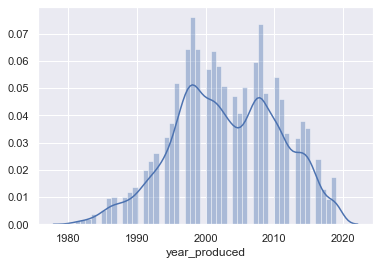

In [14]:
q=data['year_produced'].quantile(0.005)
data1=data[data['year_produced']>q]
sns.distplot(data1['year_produced'])

In [16]:
# sns.distplot(data1['odometer_value'])

In [17]:
# q = data1['odometer_value'].quantile(0.9918)
# data2 = data1[data1['odometer_value']<q]
# sns.distplot(data2['odometer_value'])

In [18]:
# sns.distplot(data2['engine_capacity'])

In [19]:
# q= data2['engine_capacity'].quantile(0.99)
# data3=data2[data2['engine_capacity']<q]
# sns.distplot(data3['engine_capacity'])

In [20]:
# sns.distplot(data3['duration_listed'])

In [21]:
# q=data3['duration_listed'].quantile(0.80)
# data4= data3[data3['duration_listed']<q]
# data4.describe(include="all")
# sns.distplot(data4['duration_listed'])

In [22]:
# sns.distplot(data4['price_usd'])

In [23]:
# q=data4['price_usd'].quantile(0.89)
# data5= data4[data4['price_usd']<q]
# sns.distplot(data5['price_usd'])

In [24]:
# data_cleaned = data.reset_index(drop=True)

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
price_usd            0
dtype: int64

In [26]:
# data

In [27]:
# log_price = np.log(data['price_usd'])
# data['log_price'] = log_price
# data

In [28]:
# data_cleaned = data.drop(['price_usd'],axis=1)
# data_cleaned

In [29]:
# data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)
# data_with_dummies.head()

In [30]:
# data_with_dummies = data_with_dummies['engine_has_gas'].map({True:1,False:0})

In [31]:
targets = data['price_usd']
inputs = data.drop(['price_usd'],axis=1)
# inputs = data['manufacturer_name']


In [60]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# variables = inputs[columns]
# a =variables.values
# print(a)
# vif = pd.DataFrame()
# vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# vif["features"] = variables.columns

In [61]:
# vif


In [62]:
# for x in data
# for i, j in vif.iterrows():
#     if j['VIF']>5:
#         new_data = new_data.drop(j['features'],axis=1)
# new_data

In [63]:
# data_no_multicollinearity = data_cleaned.drop(['engine_capacity'],axis=1)

In [64]:
# f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize=(50,10))
# ax1.scatter(new_data['manufacturer_name'],new_data['log_price'])
# ax1.set_title('manufacturer_name & price_usd')
# ax2.scatter(new_data['model_name'],new_data['log_price'])
# ax2.set_title('model_name & price_usd')
# ax3.scatter(new_data['color'],new_data['log_price'])
# ax3.set_title('color & price_usd')
# ax4.scatter(new_data['engine_has_gas'],new_data['log_price'])
# ax4.set_title('engine_has_gas & price_usd')
# plt.show()

In [65]:
# data_no_multicollinearity2 = data_no_multicollinearity.drop(['engine_capacity'],axis=1)
# data_no_multicollinearity2

In [66]:
# data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)

In [67]:
# data_with_dummies.head()

In [68]:
# data_with_dummies.columns.values

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)


StandardScaler()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(inputs,targets, test_size=0.2, random_state=365)

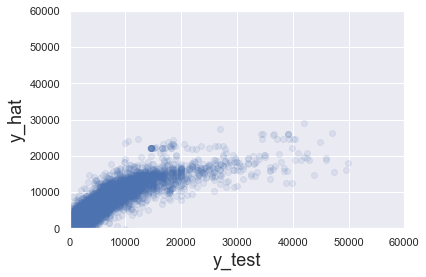

In [70]:
plt.scatter(y_test, y_hat, alpha=0.1)
plt.xlabel("y_test",size=18)
plt.ylabel("y_hat",size=18)
plt.xlim(-2,60000)
plt.ylim(-3,60000)
plt.show()

In [78]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.1)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)
y_hat_ridge = clf.predict(x_test)

In [79]:
calculate_error_table(y_test, y_hat_ridge)

MSE,MAPE,MAE,RMSE,RSQUARED
12365597.146417,264.537781,2276.218523,3516.475102,0.686411


In [82]:
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.2)
clf_lasso.fit(x_train, y_train)
y_hat_lasso = clf_lasso.predict(x_test)
calculate_error_table(y_test, y_hat_lasso)

MSE,MAPE,MAE,RMSE,RSQUARED
12365179.490430,264.558101,2276.129976,3516.415716,0.686421


In [71]:
errors= y_test - y_hat
errors.max()

33517.180967806606